In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import STL

In [2]:
data=pd.read_csv("Gold_data.csv",parse_dates=['date'])


In [3]:
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
data.dropna(inplace=True)


In [5]:
data.isna().sum()

date     0
price    0
dtype: int64

In [6]:
data.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [ ]:
data= data.set_index(pd.DatetimeIndex(data['date'])).drop('date',axis=1)


In [ ]:
print(f"The Gold prices are available for {data.index.year.max() - data.index.year.min()} years")


In [15]:
X = data.drop('price', axis=1)
y = data['price']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
data["date"]= pd.to_numeric(data["date"],errors="coerce")
data["price"]= pd.to_numeric(data["price"],errors="coerce")


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 104841.01005922032


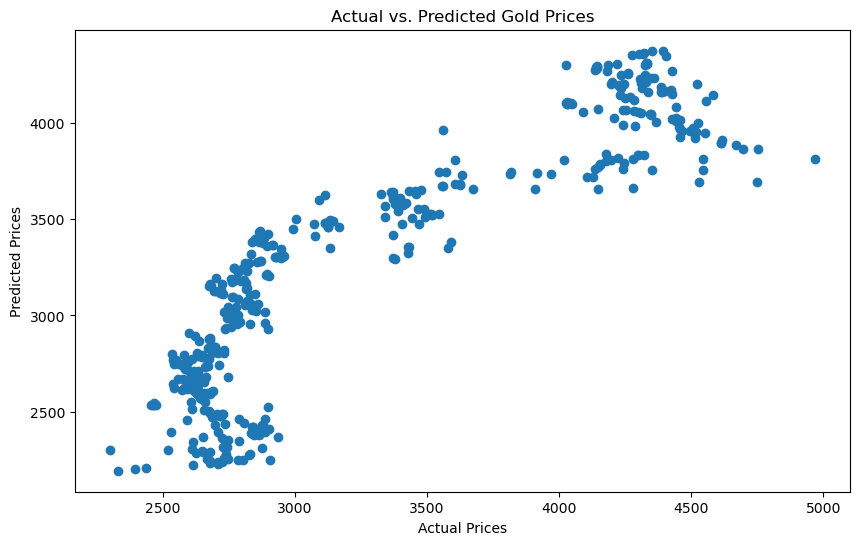

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Gold Prices")
plt.show()

In [13]:
data.dtypes

date       int64
price    float64
dtype: object